<a href="https://colab.research.google.com/github/Us9r/laskar-ai-capstone/blob/main/Edu_Care(machine_learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import
importing library and dataset from github for easier read

In [1]:
import pandas as pd #import
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Us9r/vault/refs/heads/main/capstone/datasmk2.csv') #read csv

In [3]:
df.head() #check load dataset

,gender,absences,n_agama,n_pkn,n_bindo,n_mat,n_bing,n_por,n_bjawa,n_kejuruan,...,father_edu,father_work,father_salary,mother_edu,mother_work,mother_salary,scholarship,family_size,house_status,final_score
0,P,1,94,84,87,85,82,89,89,87,...,SD sederajat,Buruh,Cukup Tinggi,SD sederajat,Tidak bekerja,Tidak Berpenghasilan,Tidak,7,Rumah Sendiri,BAIK
1,P,1,83,82,87,82,79,84,88,86,...,SMP sederajat,Karyawan Swasta,Cukup Rendah,SD sederajat,Pedagang Kecil,Cukup Rendah,Tidak,4,Sewa,CUKUP
2,P,0,94,83,87,90,84,87,87,88,...,SMA sederajat,Tidak bekerja,Tidak Berpenghasilan,SMA sederajat,Tidak bekerja,Tidak Berpenghasilan,Tidak,5,Menumpang,BAIK
3,P,3,94,83,88,85,81,89,89,88,...,SMP sederajat,Buruh,Cukup Tinggi,SD sederajat,Tidak bekerja,Tidak Berpenghasilan,Ya,4,Rumah Sendiri,BAIK
4,L,5,91,82,87,84,80,85,89,87,...,SMA sederajat,Buruh,Cukup Rendah,SD sederajat,Buruh,Cukup Rendah,Tidak,5,Sewa,BAIK


# 2. Preprocessing
encoding and normalization dataset

### Encoding target features to binary value
BAIK = 1 and CUKUP = 0

In [4]:
df['final_score'] = df['final_score'].apply(lambda x: 0 if x == 'CUKUP' else 1)

### Encoding all categorical features
using dummy encode "n(all feature) - 1" to df_encoded

In [5]:
columns_to_encode = ['gender', 'n_sikap', 'organization', 'extracurricular', 'origin_jhs', 'address', 'parent_status', 'father_edu', 'father_work', 'father_salary', 'mother_edu', 'mother_work', 'mother_salary', 'scholarship', 'house_status']
df_encoded = pd.get_dummies(df, columns=columns_to_encode, dummy_na=False, dtype=int)

In [6]:
df_encoded.head() #check encoding

,absences,n_agama,n_pkn,n_bindo,n_mat,n_bing,n_por,n_bjawa,n_kejuruan,family_size,...,mother_salary_Cukup Tinggi,mother_salary_Rendah,mother_salary_Sangat Rendah,mother_salary_Tidak Berpenghasilan,mother_salary_Tinggi,scholarship_Tidak,scholarship_Ya,house_status_Menumpang,house_status_Rumah Sendiri,house_status_Sewa
0,1,94,84,87,85,82,89,89,87,7,...,0,0,0,1,0,1,0,0,1,0
1,1,83,82,87,82,79,84,88,86,4,...,0,0,0,0,0,1,0,0,0,1
2,0,94,83,87,90,84,87,87,88,5,...,0,0,0,1,0,1,0,1,0,0
3,3,94,83,88,85,81,89,89,88,4,...,0,0,0,1,0,0,1,0,1,0
4,5,91,82,87,84,80,85,89,87,5,...,0,0,0,0,0,1,0,0,0,1


### Normalization all numerical value

In [7]:
features_to_normalize = ['absences', 'n_agama', 'n_pkn', 'n_bindo', 'n_mat', 'n_bing', 'n_por', 'n_bjawa', 'n_kejuruan', 'family_size']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to the selected features
df_normalized = df_encoded.copy()
df_normalized[features_to_normalize] = scaler.fit_transform(df_encoded[features_to_normalize])

df_normalized.head()

,absences,n_agama,n_pkn,n_bindo,n_mat,n_bing,n_por,n_bjawa,n_kejuruan,family_size,...,mother_salary_Cukup Tinggi,mother_salary_Rendah,mother_salary_Sangat Rendah,mother_salary_Tidak Berpenghasilan,mother_salary_Tinggi,scholarship_Tidak,scholarship_Ya,house_status_Menumpang,house_status_Rumah Sendiri,house_status_Sewa
0,0.142857,0.76,0.5625,0.555556,0.50,0.4375,0.777778,0.785714,0.615385,0.444444,...,0,0,0,1,0,1,0,0,1,0
1,0.142857,0.32,0.4375,0.555556,0.35,0.2500,0.500000,0.714286,0.538462,0.111111,...,0,0,0,0,0,1,0,0,0,1
2,0.000000,0.76,0.5000,0.555556,0.75,0.5625,0.666667,0.642857,0.692308,0.222222,...,0,0,0,1,0,1,0,1,0,0
3,0.428571,0.76,0.5000,0.611111,0.50,0.3750,0.777778,0.785714,0.692308,0.111111,...,0,0,0,1,0,0,1,0,1,0
4,0.714286,0.64,0.4375,0.555556,0.45,0.3125,0.555556,0.785714,0.615385,0.222222,...,0,0,0,0,0,1,0,0,0,1


In [8]:
df_normalized.info() #check preprocessing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 90 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   absences                            856 non-null    float64
 1   n_agama                             856 non-null    float64
 2   n_pkn                               856 non-null    float64
 3   n_bindo                             856 non-null    float64
 4   n_mat                               856 non-null    float64
 5   n_bing                              856 non-null    float64
 6   n_por                               856 non-null    float64
 7   n_bjawa                             856 non-null    float64
 8   n_kejuruan                          856 non-null    float64
 9   family_size                         856 non-null    float64
 10  final_score                         856 non-null    int64  
 11  gender_L                            856 non-n

# 3. Split train-test set
80%  for training and 20% for prediction, there are imbalanced class in target feature, so we're using SMOTE

the train set is made into two
- X_train, y_train
- X_train_resampled, y_train_resampled

In [9]:
# Pisahkan fitur (X) dan target (y)
X = df_normalized.drop('final_score', axis=1)
y = df_normalized['final_score']

# split train-test set dengan pemisahan target merata (parameter stratify)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (684, 89)
Shape of X_test: (172, 89)
Shape of y_train: (684,)
Shape of y_test: (172,)


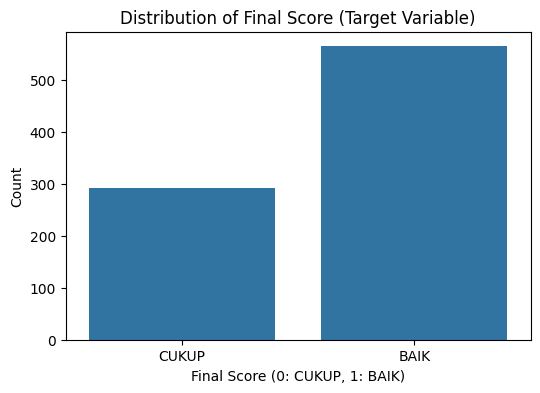

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='final_score', data=df_normalized)
plt.title('Distribution of Final Score (Target Variable)')
plt.xlabel('Final Score (0: CUKUP, 1: BAIK)')
plt.ylabel('Count')
plt.xticks([0, 1], ['CUKUP', 'BAIK'])
plt.show() #distribusi fitur target

### SMOTE

In [11]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Distribusi kelas sebelum SMOTE train-set
print("Original dataset shape %s" % Counter(y_train))
print("Resampled dataset shape %s" % Counter(y_train_resampled))

# Distribusi kelas setelah SMOTE pada train-set
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Original dataset shape Counter({1: 451, 0: 233})
Resampled dataset shape Counter({1: 451, 0: 451})
Shape of X_train_resampled: (902, 89)
Shape of y_train_resampled: (902,)
Shape of X_test: (172, 89)
Shape of y_test: (172,)


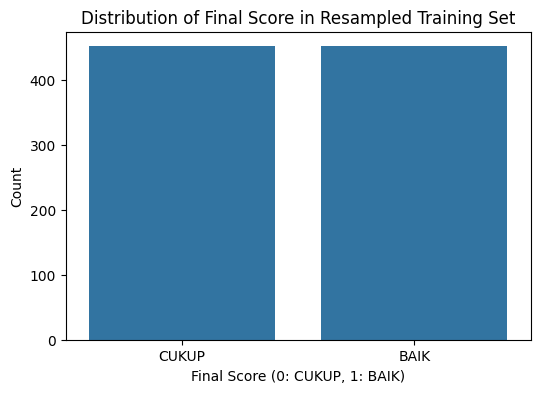

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled)
plt.title('Distribution of Final Score in Resampled Training Set')
plt.xlabel('Final Score (0: CUKUP, 1: BAIK)')
plt.ylabel('Count')
plt.xticks([0, 1], ['CUKUP', 'BAIK'])
plt.show()

# 4. Modeling

### Inisialisasi

In [13]:
knn_model = KNeighborsClassifier()
svm_model = SVC(probability=True)  # probability=True is needed for plotting ROC curve later
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

### Training

In [14]:
knn_model.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [15]:
svm_model.fit(X_train_resampled, y_train_resampled)

SVC(probability=True)

In [16]:
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [17]:
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Predict

In [18]:
knn_pred = knn_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# simpan nilai untuk visualisasi ROC Curve
knn_proba = knn_model.predict_proba(X_test)[:, 1]
svm_proba = svm_model.predict_proba(X_test)[:, 1]
rf_proba = rf_model.predict_proba(X_test)[:, 1]
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

# 5. Model Evaluation
> - XGBoost memiliki akurasi keseluruhan yang sedikit lebih tinggi (acc = 0.87, auc = 0.94).

> - Random Forest memiliki kemampuan pembedaan antara kelas yang sedikit lebih baik (acc = 0.86, auc = 0,95).

### ROC Curve

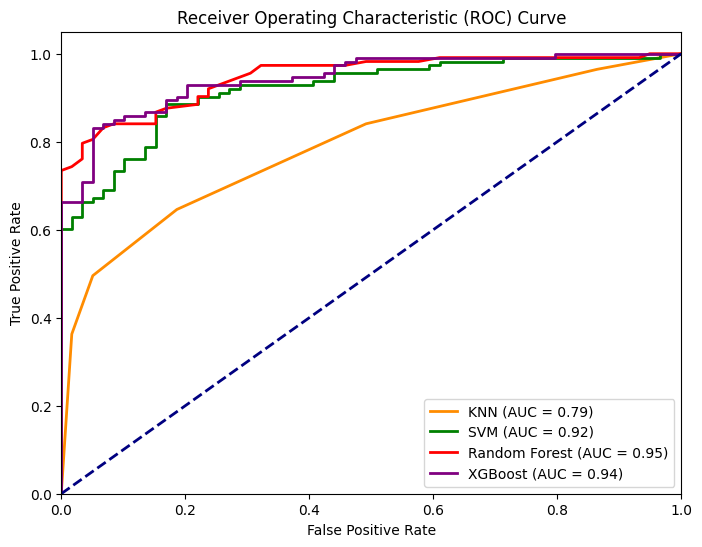

In [19]:
# Hitung nilau ROC
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_proba)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_proba)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Accuracy

In [20]:
def evaluate_model(y_true, y_pred, model_name):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average='weighted')
  recall = recall_score(y_true, y_pred, average='weighted')
  f1 = f1_score(y_true, y_pred, average='weighted')

  print(f"Evaluation Metrics for {model_name}:")
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1-Score: {f1:.4f}")
  print("-" * 30)

# metrik evaluasi tiap model
evaluate_model(y_test, knn_pred, "K-Nearest Neighbors")
evaluate_model(y_test, svm_pred, "Support Vector Machine")
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, xgb_pred, "XGBoost")

Evaluation Metrics for K-Nearest Neighbors:
Accuracy: 0.7035
Precision: 0.7580
Recall: 0.7035
F1-Score: 0.7109
------------------------------
Evaluation Metrics for Support Vector Machine:
Accuracy: 0.8547
Precision: 0.8553
Recall: 0.8547
F1-Score: 0.8549
------------------------------
Evaluation Metrics for Random Forest:
Accuracy: 0.8605
Precision: 0.8635
Recall: 0.8605
F1-Score: 0.8615
------------------------------
Evaluation Metrics for XGBoost:
Accuracy: 0.8721
Precision: 0.8733
Recall: 0.8721
F1-Score: 0.8726
------------------------------


### Confussion Matrix

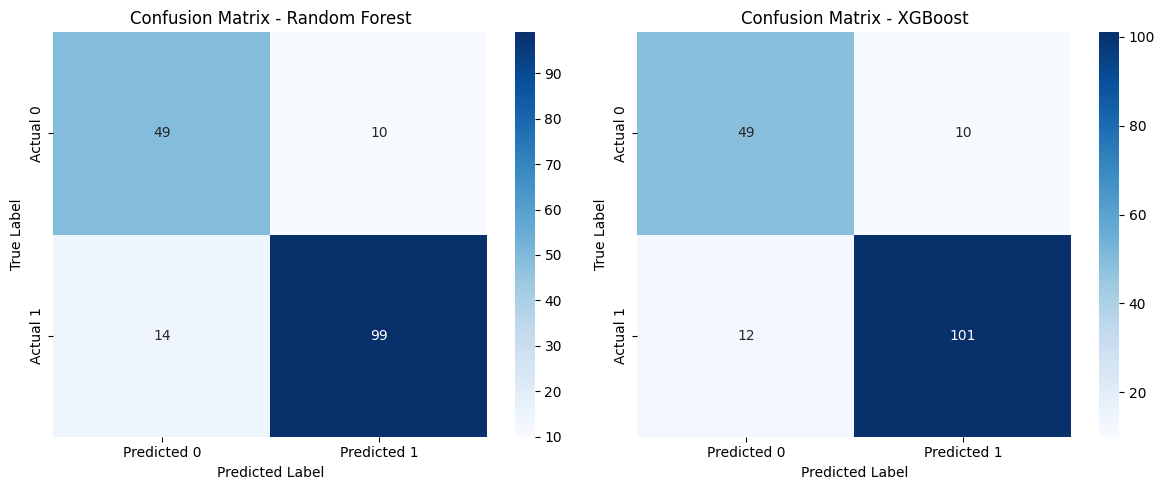

In [21]:
# hitung conffusion matrix
cm_rf = confusion_matrix(y_test, rf_pred)
cm_xgb = confusion_matrix(y_test, xgb_pred)

# visualisasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 2, 2)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()